# Convolutional Neural Networks & Recurrent Neural Networks

# **Redes Neurais Convolucionais**

Neste material, vamos introduzir os principais conceitos e a implementação de **redes neurais convolucionais (convolutional neural networks - CNN)**.

## Introdução

Para atacar determinados problemas, precisamos modificar a **arquitetura** da rede neural empregada. Quando o objetivo do modelo é trabalhar com **imagens**, há uma arquitetura especializada para isso: as CNNs! 

Considere a imagem a seguir:

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/807be939-f81f-425c-a974-341065fb1131.jpg" width="40%"/>
</center>

*Uma raposa em seu habitat. Mas você não precisou ler esta legenda para reconhecer isto... Fonte: https://www.nps.gov/lacl/learn/nature/animals.htm.*

Para humanos, é fácil reconhecer que a imagem se trata de uma raposa. E é bem provável que ainda conseguiríamos identificar a imagem de uma raposa em representações mais gerais, como, por exemplo, se ela estivesse de frente ao invés de estar de perfil. Esta generalização, embora fácil pra jumanos, é um problema **muito complicado para as redes neurais de arquitetura mais simples**, como a rede neural densa que construímos anteriormente.

Lembre que uma imagem é representada por uma **matriz de números**. A imagem da raposa acima tem 700 pixels de altura e 700 pixels de largura. Ou seja, o quadrado inteiro da imagem tem 700 x 700 = **490.000 pixels**. Lembre-se também de que uma foto colorida é composta por **3 canais de cores**, vermelho, verde e azul (**RGB**):

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/8ef5da91-7dfa-46b4-b84d-7fa5af75c2a6.png" width="70%"/>
</center>

 Assim, nossa imagem terá: \\( 700 \times 700 \times 3 = 1.470.000 \\) inputs! Se optarmos por utilizar como primeira camada oculta uma camada densa com \\( l_1 = 1000 \\) neurônios, teremos uma matriz de pesos para a primeira camada de: \\( 1.470.000 \times 1000 = 1.470.000.000 \\) elementos: cerca de **1.5 bilhão de parâmetros só para primeira camada**! Com essa quantidade enorme de parâmetros é extremamente difícil não cair em **overfitting** mesmo com uma quantidade **muito grande de observações no conjunto de treinamento**.

Além disso, há um outro problema: quando fatiamos a imagem para montar o vetor de input, simplesmente empilhando as colunas da matriz, perdemos muita informação espacial relevante. Pense no pequeno bloco de pixels que corresponde ao olho da raposa: a **posição dos pixels** e de **seus vizinhos mais próximos** carregam **muita informação** sobre o objeto "olho":

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/79937950-01a6-4bb8-bca0-bb0419e7f869.png" width="40%"/>
</center>

Enfim, seja pela quantidade imensa de parâmetros (tendência ao overfitting), seja pela perda de muita informação espacial, precisamos de um novo método que possa melhorar a forma que a rede neural **trabalha com inputs pictóricos**.

## Filtros

A introdução de filtros de imagem (ou *kernels*) antes de passar a imagem para uma rede neural convencional teve uma importância crucial para resolver os desafios listados na seção anterior.

Os filtros nos permitem detectar **bordas na imagem**, ao mesmo tempo em que mantêm a quantidade de parâmetros relativamente **baixa**. Como as próprias imagens, os filtros são representados por **pequenas matrizes**, com certos padrões numéricos únicos. Abaixo, temos dois exemplos de filtros: o primeiro serve para detectar bordas verticais na imagem; o segundo, horizontais. 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/83a95036-3ad7-4280-85ad-32d0d3bb567f.png" width="40%"/>
</center>

### Convolução

A operação que realizamos entre a matriz da imagem e um determinado filtro é chamada de **convolução**. 

Seja a matriz de uma imagem P&B de 6 pixels x 6 pixels e o filtro de bordas verticais que apresentamos. Para calcular a operação de convolução, denotada por um asterisco *, entre a imagem e o filtro:

- começamos "sobrepondo" o filtro no canto superior esquerdo da matriz da imagem;

- calculamos o produto, elemento por elemento, do filtro com o trecho da imagem sobreposto e somamos tudo. No exemplo, abaixo, temos:

\\[ 1 \times 2 + 1 \times 7 + 1 \times 0 + 0 \times 1 + 0 \times 4 + 0 \times 9 + (-1) \times 0 + (-1) \times 2 + (-1) \times 10 = -3 \\]

O resultado, -3, será o primeiro elemento da matriz 4x4 resultante da convolução, como ilustra a 1ª etapa da figura abaixo;

- a seguir, deslizamos nosso filtro uma casa para direita sobre a matriz da imagem e reproduzimos o cálculo de soma dos produtos; neste caso, dá -8 (2ª etapa);
- quando cobrirmos todas essas colunas nessas 3 primeiras linhas, voltamos ao canto esquerdo, **descemos** 1 linha e continuamos, até a 16ª etapa, quando preenchemos toda a matriz-resultado à esquerda. 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/1f634646-1d13-44b9-945c-c65a8489cb94.png" width="80%"/>
</center>

**Nota**: o número de casas "puladas" a cada etapa, chamado *stride*, não precisa ser 1. Também podemos controlar o tamanho final da nossa matriz resultado da convolução. Ela não precisa ser menor (4x4) do que a original (6x6); podemos ajustar o *padding*, outro hiperparâmetro, para conservar a dimensão original. 

Visualização dos filtros horizontal e vertical:
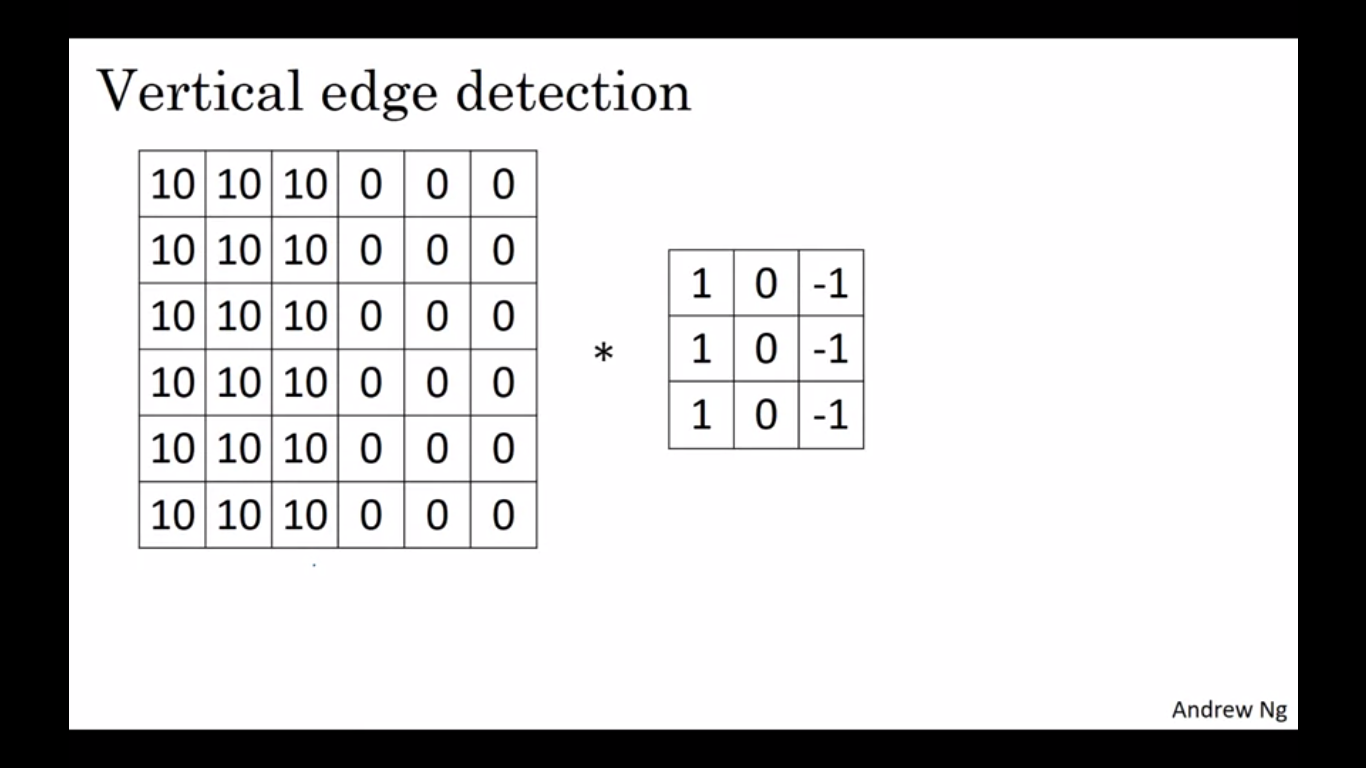

### Imagens coloridas

Se a imagem for **colorida**, em vez de uma matriz de imagem e uma de filtro, cada uma delas será composta de 3 matrizes, uma para cada cor: vermelha, verde e azul. O procedimento de cálculo é como no caso da imagem P&B, com a diferença de que todos os 3 filtros vão percorrer, juntos, cada um uma camada de cor. Em cada iteração, seus resultado também serão somados, de modo que a matriz final continuará tendo dimensão 4x4. A figura abaixo demonstra o processo: 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/73c5d655-2984-4b31-bddb-f55da57c5bbe.png" width="80%"/>
</center>

## Múltiplos filtros

Para identificar formas mais complexas, não basta apenas um único filtro, vertical ou horizontal. Na prática, queremos poder ter N filtros, cada um responsável por uma forma específica. 

Conforme ilustra a próxima figura: para cada filtro, aplicamos o processo de convolução. Ao fim, teremos **N matrizes bidimensionais**, que podemos empilhar para formar uma nova matriz tridimensional e, se quisermos, continuarmos aplicando a operação de convolução.

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/8baa30ea-9867-4bb6-88c8-2f23c9465bf3.png" width="100%"/>
</center>

## Max Pooling

Outros procedimentos bastante usados são os de amostragem, entre os quais o mais usado é o **max pooling**. Ele consiste em particionar a imagem em blocos (conjuntos de pixels) e, para cada um desses blocos, ele **retorna o maior deles.**

Imagine que tomamos o primeiro bloco 3x3 de uma imagem (bloco do canto superior esquerdo), que tem como valor dos pixels: \\( (70, 90, 95, 62, 57, 1, 41, 68, 53) \\).  Se aplicarmos o max pooling a este bloco, obteremos 95, que é o maior elemento do bloco.

Se repetirmos a operação para toda a matriz da imagem, o que obteremos no fim é uma nova matriz, menor do que a original, apenas com os pixels **representes mais fortes dela**. Assim, max pooling pode ser visto como forma de **compressão** da imagem original.


## Arquitetura de uma rede neural convolucional

Por fim, juntando tudo que aprendemos até aqui, podemos construir uma rede neural convolucional (CNN, na sigla em inglês) completa. 

A figura abaixo ilustra um modelo genérico. Note que a imagem de input pode passar por várias camadas de convolução e *pooling* antes de, efetivamente, entrar na rede neural totalmente conectada que estamos habituados. 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/5afe976c-6deb-4b63-9fef-ae7176eb295a.png" width="100%"/>
</center>


Todas essas camadas anteriores garantem que a features de alto nível de abstração, como rostos, carros, bicicletas, etc., estão sendo construídas ao longo da rede, partindo de lá do começo, dos filtros verticais e outros. Esse procedimento, feito nas primeiras camadas da CNN, é chamado de **feature extraction**. Já a classificação em si, é feita pela componente **classificadora** da rede neural, que comumente tem arquitetura densa. De forma genérica, a CNN é composta por estas duas componentes:

<center>
<img src="https://miro.medium.com/max/3712/1*7K4ZTTfZb-hbjoADbisHAg.png" width="80%"/>
</center>

## CNN em Python

Vamos agora construir nossa CNN, utilizando o Keras!

Vamos ler o MNIST e fazer as mesmas etapas de pré-processamento que fizemos no material anterior:

In [1]:
import numpy as np
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt

In [2]:
 def carrega_mnist(caminho, tipo = 'train'):
    label_caminho = os.path.join(caminho, '%s-labels-idx1-ubyte.gz' % tipo)
    imagens_caminho = os.path.join(caminho, '%s-images-idx3-ubyte.gz' % tipo)
        
    with gzip.open(label_caminho, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(imagens_caminho, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        imagens = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return imagens, labels

In [5]:
x_treino, y_treino = carrega_mnist("../datasets")
x_teste, y_teste = carrega_mnist("../datasets", "t10k")

In [6]:
# pra garantir maior rapidez do algoritmo, reescalamos os dados entre 0 e 1:
m = np.max(x_treino)
x_treino = x_treino/m
x_teste = x_teste/m

In [7]:
# fazendo o one-hot encoding dos targets
from sklearn.preprocessing import OneHotEncoder

hot = OneHotEncoder()
y_treino = hot.fit_transform(y_treino.reshape(-1, 1)).toarray()
y_teste = hot.fit_transform(y_teste.reshape(-1, 1)).toarray()

In [8]:
# separando o conjunto de validação
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_treino, y_treino, test_size = 0.1, random_state = 13)

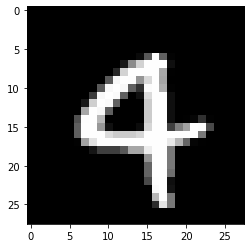

In [9]:
plt.imshow(x_treino[0].reshape(28, -1), cmap='gray')

In [10]:
x_treino[0].shape

(784,)

In [16]:
y_treino[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [11]:
x_treino[0].reshape(28, -1).shape

(28, 28)

In [13]:
x_treino[0].reshape(28, 28).shape

(28, 28)

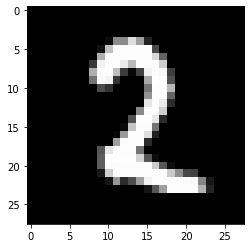

In [14]:
plt.imshow(x_treino[2].reshape(28, -1), cmap='gray')

In [15]:
y_treino[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

### Arquitetura

Agora definimos a arquitetura de nossa rede neural, usando o Keras!

A componente de feature extraction de nossa CNN será composta por:

- Uma camada de [convoluções 2D](https://keras.io/api/layers/convolution_layers/convolution2d/) com 32 filtros 3x3, com função de ativação ReLu;
- Uma camada de [max pooling 2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) com blocos 2x2;
- Uma camada de convoluções 2D com 64 filtros 3x3, com função de ativação ReLu;
- Uma camada de max pooling 2D com blocos 2x2;
- Uma camada [flatten](https://keras.io/api/layers/reshaping_layers/flatten/), que transforma a matriz final representante da imagem em um vetor unidimensional, que será input da componente de classificação.

Em todos os casos acima, utilizamos as versões 2D das camadas devido aos nossos dados: o MNIST é um conjunto de imagens em preto-e-banco.

A componente de classificação da CNN será uma rede neural densa composta por:

- Uma camada [densa](https://keras.io/api/layers/core_layers/dense/) com 100 neurônios, com função de ativação ReLu;
- Uma camada de output com função de ativação Softmax, dado que temos um problema de classificação multiclasse.

É importante notar que a arquitetura descrita acima não é a única possível. É sempre sua responsabilidade fazer escolhas importantes como: quais camadas utilizar e quais seus parâmetros (exemplo: o número de filtro nas convoluções, o tamanho dos blocos no max pooling, o número de neurônios na camada densa, etc.). Como sempre, o processo é iterativo: experimente diferentes arquiteturas até encontrar a mais adequada!

No código:

In [18]:
# Importação de funções úteis do Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [19]:
x_treino.shape

(54000, 784)

In [20]:
cnn = Sequential()

# feature extraction
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())

# classificação
cnn.add(Dense(100, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

### Treinamento

Agora, compilamos a rede neural, explicitando o otimizador e a função de perda desejadas:

In [21]:
# Importando o otimizador
from tensorflow.keras.optimizers import RMSprop


In [22]:
cnn.compile(loss = 'categorical_crossentropy', metrics = ['binary_accuracy'])

Por fim, treinamos a rede neural! Basta usar o método ".fit()", determinando o número de epochs bem como os dados de treino e validação:

In [23]:
 x_treino.reshape((x_treino.shape[0], 28, 28, 1)).shape

(54000, 28, 28, 1)

In [24]:
# Nossos dados de entrada precisam ter o formato (amostra, 28, 28, 1)
x_treino = x_treino.reshape((x_treino.shape[0], 28, 28, 1))

x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))

x_teste = x_teste.reshape((x_teste.shape[0], 28, 28, 1))

In [25]:
# o parâmetro "verbose=1" é utilizado para que informações sejam exibidas durante o treinamento
historico = cnn.fit(x_treino, y_treino, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1300 - binary_accuracy: 0.9922 - val_loss: 0.0720 - val_binary_accuracy: 0.9962
Epoch 2/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0437 - binary_accuracy: 0.9974 - val_loss: 0.0384 - val_binary_accuracy: 0.9978
Epoch 3/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0307 - binary_accuracy: 0.9982 - val_loss: 0.0425 - val_binary_accuracy: 0.9976
Epoch 4/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0248 - binary_accuracy: 0.9986 - val_loss: 0.0433 - val_binary_accuracy: 0.9978
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0211 - binary_accuracy: 0.9989 - val_loss: 0.0437 - val_binary_accuracy: 0.9976
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0166 - binary_accuracy: 0.9991 - val_loss: 0.0459 - val_binary_accuracy: 0.9977
Epoch 7/10
1688/1688 [==================

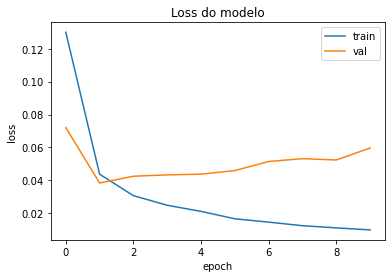

In [26]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Loss do modelo")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

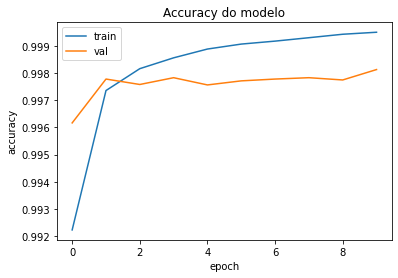

In [27]:
plt.plot(historico.history['binary_accuracy'])
plt.plot(historico.history['val_binary_accuracy'])
plt.title("Accuracy do modelo")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'val'])
plt.show()

### Previsões

### E, pronto! A rede neural está treinada! Podemos utilizar o classification report para avaliar sua performance nos dados de teste:

In [28]:
y_teste.argmax(1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
# fazendo as predições
y_pred = cnn.predict_classes(x_teste)

from sklearn.metrics import classification_report

# exibe o classification report
print(classification_report(y_teste.argmax(1), y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg    

In [30]:
x_teste.shape

(10000, 28, 28, 1)

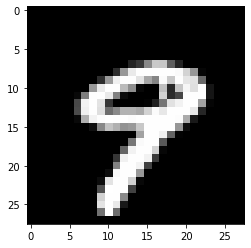

In [38]:
plt.imshow(x_teste[9], cmap='gray')

In [39]:
y_pred[9]

9

In [33]:
y_teste[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

# Redes Neurais Recorrentes

Neste material, vamos introduzir os principais conceitos e a implementação de **redes neurais recorrentes (recurrent neural networks - RNN)**.

## Introdução

Veremos agora uma nova arquitetura de redes neurais, especializada na modelagem de **dados sequenciais**: as RNNs!


Suponha que estejamos interessados em desenvolver um algoritmo de **análise de sentimentos** para classificar determinados *tweets* como uma avaliação "positiva" ou "negativa" de certo jogador de futebol. Imagine o seguinte tweet após um jogo:

> *Poucos jogadores superam Ronaldo hoje em dia.*

Se associássemos cada uma das 7 palavras a uma feature de input \\( x^{< t >} \\), com \\( t \\) de \\( 1 \\) até \\( T_x = 7 \\), poderíamos tentar usar a rede abaixo para prever o output \\( y \\) (1 para "positivo", 0 para "negativo"):

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/422f870c-5f77-46cb-961a-dffc1586ff62.png" width="70%"/>
</center>

No entanto, uma rede neural densa comum não é adequada para lidar com *dados sequenciais*, como frases ou texto e séries temporais, pois:

1. o tamanho do vetor de **inputs é variável** - frases diferentes poden ser compostas por um número diferente de palavras;
2. o significado de um atributo **depende de sua posição no texto**, bem como do seu **relacionamento com outros atributos**.

Por exemplo, imagine a seguinte frase:

> *Carlos costumava ser muito bom em matemática; assim, sua nota na prova de hoje surpreendeu a professora Ana.*

Ao ler apenas a última sentença, não sabemos se a nota de Carlos na prova "surpreendeu" porque ele foi bem **ou** porque ele foi mal. Quando lemos a frase inteira, percebemos de imediato que **ele foi mal**, *já que costumava ser bom em matemática* - ou seja, ao ler a segunda sentença, **nos lembramos da primeira**.

A **ordenação** também é um fator-chave. Considere o silogismo:

> *Todos os cães são mamíferos. Todos os poodles são cães. Logo, todos os poodles são mamíferos.*

Se trocarmos apenas algumas palavras, o sentido lógico da frase se *perde completamente*:

> *Todos os cães são poodles. Todos os mamíferos são cães. Logo, todos os mamíferos são poodles.*

E é para resolver problemas com **dados sequenciais** e endereçar as questões acima que as RNNs foram introduzidas!

## Arquitetura de uma rede neural recorrente

A arquitetura exata de uma RNN varia de acordo com a aplicação, mas em geral a **recorrência** faz com que que **as saídas de uma camada sirvam de entrada para a camada seguinte**, de modo que a rede é **retroalimentada**, conforme ilustrado a seguir:

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/33a4ab3d-377f-4c51-98f5-7af88e7926c9.png" width="15%"/>
</center>

Pode ser mais ilustrativo visualizarmos a rede neural "aberta", de maneira explícita:

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/c7b9a6f4-0233-49d6-a7ee-5f9f47c6741b.png" width="70%"/>
</center>

### Aplicações diferentes, arquiteturas diferentes

Há diversas situações que exigem modelos sequenciais. Alguns exemplos:

- Previsão de séries temporais;
- Reconhecimento de fala;
- Tradução de idiomas;
- Reconhecimento de entidades (por exemplo, reconhecer nomes próprios numa sentença);
- Reconhecimento de ações em vídeo (como "rapaz correndo", "moça tocando violão");
- Geração de música;
- Problemas de genética, que envolvem sequenciamentos de DNAs.

Aplicações distintas pedem por arquiteturas específicas distintas de RNNs. Abaixo, onde estamos representando as camadas por quadradinhos cinzas, podemos ver uma sequência de arquiteturas de RNNs comuns. Importante: **(\\( T_x \\) e \\( T_y \\) se referem, respectivamente, à quantidade de inputs e de outputs):**

**Classificação de sentimentos:** arquitetura *many-to-one* \\( T_x > 1 \\) e \\( T_y = 1 \\)
<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/6fc58014-3140-4343-947c-5c6e57cf6ca7.png" width="50%"/>
</center>

**Reconhecimento de entidades:** arquitetura *many-to-many* \\( T_x = T_y \\)
<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/419a884a-0630-451d-b40a-78590330a740.png" width="50%"/>
</center>

**Tradução:** arquitetura *many-to-many* \\( T_x \neq T_y \\) 
<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9372f071-2fbc-4d18-b08e-20b92660ff7e.png" width="70%"/>
</center>

## Células de memória

Como discutimos acima, RNNs são especialistas em modelar dados sequenciais. No entanto, RNNs tradicionais sofrem de um problema de "memória curta": informações do início da sequência são "esquecidas", e acabam não sendo carregadas para os passos posteriores. Então, por exemplo, se quisermos processar uma frase muito longa, a RNN acaba desconsiderando as primeiras palavras da frase para fazer as predições, o que pode ser problemático! Ou então, na predição de séries temporais: devido à memória curta, apenas os instantes de tempo mais recentes seriam considerados, enquanto os iniciais seriam esquecidos.

Para resolver este problema muito relevante, foram introduzidas as **células de memória**, cujo objetivo é exatamente evitar esta perda de informação sobre os primeiros elementos da sequência, ou seja, criar uma "memória de longo prazo"!

A principal célula de memória é a **LSTM**, da sigla em inglês: "Long Short-Term Memory". Chamamos a LSTM de "célula" devido à sua estrutura interna, com diferentes operações matemáticas que são realizadas com o fim de criar "memória". A figura a seguir ilustra a célula LSTM:

<center>
<img src="https://miro.medium.com/max/700/1*0f8r3Vd-i4ueYND1CUrhMA.png" width="70%">
</center>

De maneiras intuitiva, a célula de LSTM é capaz de assimilar apenas os elementos **relevantes** da sequência, **não importa se estes estão no começo, meio, ou fim da sequência!**

Para fazer isso, a LSTM conta com dois elementos importantes: primeiro, o **cell state**, que consiste em uma espécie de "trilho de trem", conectando o início da sequência aos elementos futuros. É atraves deste trilho de trem que a RNN tem acesso a todos os elementos da sequência, inclusive os elementos iniciais! 

Segundo, a célula LSTM conta com três **portas** (*gates*), que têm como objetivo processar o cell state juntamente com o input do passo atual e o output (*hidden state*) do último passo, de modo a decidir o que será esquecido, e o que será propagado para o próximo passo da recorrência. As três portas são:

- Porta do esquecimento (*forget gate*): é a porta que decide quais elementos dos passos anteriores são relevantes e devem ser lembrados, e quais devem ser esquecidos.
- Porta de input (*input gate*): é a porta que atualiza o cell state, ao decidir que informação do input atual deve ser adicionado ao cell state.
- Porta de output (*output gate*): é a porta que combina o cell state aqualizado com o output do passo anterior e o input do passo atual, e decide o que será propagado para o próximo passo.

Com isso, a LSTM ganha a habilidade de regular o fluxo de informação, isto é, decidir quais dados da sequência devem ser lembrados, e quais devem ser esquecidos, **através de toda a sequência!**


## RNN em Python

Vamos agora construir nossa RNN, utilizando o Keras!

Os dados que vamos utilizar estão disponíveis no próprio Keras. Se trata de um dataset supervisionado para **análise de sentimentos**, onde temos como features diversos comentários sobre filmes feitos no IMDB, e como target qual é o sentimento do comentário (positivo ou negativo). Para saber mais e sacessar o dataser original, [clique aqui](https://ai.stanford.edu/~amaas/data/sentiment/)

O Keras disponibilizas uma [versão pré-processada do dataset](https://keras.io/api/datasets/imdb/), em que os comentários já foram transformados em vetores numéricos: cada comentário foi trasnformado em uma lista numérica de inteiros, onde cada número representa o índice respectivo à palavra segundo sua frequência no corpus, isto é, o índice "3" é referente à terceira palavra mais frequente no corpus.

Os dados são lidos através da função `keras.datasets.imdb.load_data()`. A leitura é feita já de modo a limitar o tamanho do dicionário a 20 mil palavras (a partir do `num_words=max_features`), e também o tamanho máximo do input, \\ ( T_x \\), que é definido por `maxlen` como sendo 200. Utilizamos também a função `keras.preprocessing.sequence.pad_sequences` para garantir que frases com menos de 200 palavras tenham as palavras vazias preenchidas com zero no vetor numérico (processo chamado de "padding").

In [40]:
import numpy as np
from tensorflow import keras

In [41]:
# vamos considerar apenas as 20 mil palavras mais frequentes no corpus
max_features = 20000  

# cada frase terá, no máximo, 200 palavras.
maxlen = 200 

# lendo os dados
(x_treino, y_treino), (x_teste, y_teste) = keras.datasets.imdb.load_data(num_words=max_features)
# limitando o tamanho das frases/fazendo o padding
x_treino = keras.preprocessing.sequence.pad_sequences(x_treino, maxlen=maxlen)
x_teste = keras.preprocessing.sequence.pad_sequences(x_teste, maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


In [42]:
x_treino

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [43]:
# separando o conjunto de validação
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_treino, y_treino, test_size = 0.1, random_state = 13)

Agora definimos a arquitetura de nossa rede neural:

- Primeiramente, adicionamos uma camada de [Input](https://keras.io/api/layers/core_layers/input/), onde explicitamos os tamanho do input e o tipo de dados (lembre-se, temos listas de inteiros);

- A camada de input acima é importante para a próxima camada, de [Embedding](https://keras.io/api/layers/core_layers/embedding/), que é utilizada para fazer o word embedding do nosso corpus. O segundo argumento, indica a dimensão do embedding: no nosso caso, teremos um embedding de dimensão 128. Lembrando que o embedding é uma forma de representar palavras de modo que leva em consideração a similaridade semântica/sintática/léxica. Para saber mais, [clique aqui](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795) ou [aqui](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa);

- Uma camada recorrente consiste de uma única célula [LSTM](https://keras.io/api/layers/recurrent_layers/lstm/) com 64 neurônios;

- Uma camada [Densa](https://keras.io/api/layers/core_layers/dense/) com 64 neurônios e função de ativação ReLu;

- Uma camada de output com função de ativação sigmoid -- lembre que nosso problema é de classificação binária (sentimento positivo ou negativo do comentário).
 
Aqui novamente, ressaltamos que a arquitetura descrita acima não é a única possível, sendo sempre sua responsabilidade fazer escolhas importantes quanto às camadas seus parâmetros. Como sempre, o processo é iterativo: experimente diferentes arquiteturas até encontrar a mais adequada!

No código:

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [45]:
rnn = Sequential()

# camadas de input e embedding
rnn.add(Input(shape=(maxlen,), dtype="int32"))
rnn.add(Embedding(max_features, 128))

# camada recorrente: célula LSTM
rnn.add(LSTM(64))

# camadas de classificação e output (classificação binária!)
rnn.add(Dense(64, activation="relu"))
rnn.add(Dense(1, activation="sigmoid"))

In [46]:
# compilando o modelo com otimizador adam
# e função de perda pra classificação binária
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

# fitando o modelo com mini-batch de tamanho 32
rnn.fit(x_treino, y_treino, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
704/704 [==============================] - 68s 96ms/step - loss: 0.4039 - accuracy: 0.8181 - val_loss: 0.3361 - val_accuracy: 0.8672
Epoch 2/5
704/704 [==============================] - 60s 85ms/step - loss: 0.2079 - accuracy: 0.9218 - val_loss: 0.3480 - val_accuracy: 0.8788
Epoch 3/5
704/704 [==============================] - 61s 87ms/step - loss: 0.1255 - accuracy: 0.9552 - val_loss: 0.3731 - val_accuracy: 0.8712
Epoch 4/5
704/704 [==============================] - 58s 83ms/step - loss: 0.0788 - accuracy: 0.9727 - val_loss: 0.4493 - val_accuracy: 0.8812
Epoch 5/5
704/704 [==============================] - 58s 82ms/step - loss: 0.0633 - accuracy: 0.9796 - val_loss: 0.4453 - val_accuracy: 0.8684


Note que explicitamos apenas 2 epochs para o treinamento. Isto é comum para RNNs: devido à arquitetura recorrente, cada epoch demora consideravelmente, de modo que não é comum utilizarmos um número muito grande de epochs.

E, pronto! A rede neural está treinada! Podemos utilizar o classification report para avaliar sua performance nos dados de teste:

In [47]:
# fazendo as predições
y_pred = rnn.predict_classes(x_teste)

from sklearn.metrics import classification_report

# exibe o classification report
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     12500
           1       0.86      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

